In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('C:/Users/kdeep/Downloads/internship-data-1.csv')

In [3]:
df1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,1-1-2017 0:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,1-1-2017 0:05,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,1-1-2017 0:10,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,1-1-2017 0:15,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,1-1-2017 0:20,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [4]:
df1.dtypes

time                        object
Cyclone_Inlet_Gas_Temp      object
Cyclone_Material_Temp       object
Cyclone_Outlet_Gas_draft    object
Cyclone_cone_draft          object
Cyclone_Gas_Outlet_Temp     object
Cyclone_Inlet_Draft         object
dtype: object

In [5]:
df1['time'] = pd.to_datetime(df1['time'])

In [6]:
df1.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [7]:
sf2=df1[["Cyclone_Inlet_Gas_Temp", "Cyclone_Material_Temp","Cyclone_Outlet_Gas_draft","Cyclone_cone_draft","Cyclone_Gas_Outlet_Temp","Cyclone_Inlet_Draft"]]

In [8]:
sf3 = sf2.apply(pd.to_numeric, errors='coerce')

In [9]:
sf3.dtypes

Cyclone_Inlet_Gas_Temp      float64
Cyclone_Material_Temp       float64
Cyclone_Outlet_Gas_draft    float64
Cyclone_cone_draft          float64
Cyclone_Gas_Outlet_Temp     float64
Cyclone_Inlet_Draft         float64
dtype: object

In [10]:
sf3.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376399.000000,376128.000000,376398.000000,376399.000000,376398.000000,376397.000000
mean,727.348549,750.830483,-177.820678,-164.572599,715.759998,-141.302857
std,328.664814,350.921068,99.147236,90.103020,325.346459,77.615576
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,856.270000,867.667500,-247.190000,-226.770000,801.960000,-193.510000
50%,882.380000,913.360000,-215.260000,-198.560000,871.530000,-169.460000
75%,901.110000,943.660000,-170.130000,-143.640000,899.300000,-136.290000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


In [11]:
dfa= df1['time']

In [12]:
dftb=pd.concat([dfa, sf3], join = 'outer', axis = 1)

In [13]:
dftb.isna().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [14]:
dbtc = dftb

In [15]:
dbtc.dropna(inplace=True)

In [16]:
dbtc.isna().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [17]:
dbtd=dbtc[["Cyclone_Inlet_Gas_Temp", "Cyclone_Material_Temp","Cyclone_Outlet_Gas_draft","Cyclone_cone_draft","Cyclone_Gas_Outlet_Temp","Cyclone_Inlet_Draft"]]

In [18]:
Q1 = dbtd.quantile(0.25)
Q3 = dbtd.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cyclone_Inlet_Gas_Temp      44.84
Cyclone_Material_Temp       76.00
Cyclone_Outlet_Gas_draft    77.04
Cyclone_cone_draft          83.09
Cyclone_Gas_Outlet_Temp     97.26
Cyclone_Inlet_Draft         57.20
dtype: float64


In [19]:
dbte = (dbtd < (Q1 - 1.5 * IQR)) |(dbtd > (Q3 + 1.5 * IQR))

In [20]:
dbtt=dbtc['time']

In [21]:
dftf=pd.concat([dbtt, dbte], join = 'outer', axis = 1)

In [22]:
Anomaly = dftf
Anomaly.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,False,False,False,False,False,False
1,2017-01-01 00:05:00,False,False,False,False,False,False
2,2017-01-01 00:10:00,False,False,False,False,False,False
3,2017-01-01 00:15:00,False,False,False,False,False,False
4,2017-01-01 00:20:00,False,False,False,False,False,False


In [23]:
Anomaly

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,False,False,False,False,False,False
1,2017-01-01 00:05:00,False,False,False,False,False,False
2,2017-01-01 00:10:00,False,False,False,False,False,False
3,2017-01-01 00:15:00,False,False,False,False,False,False
4,2017-01-01 00:20:00,False,False,False,False,False,False
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,False,False,False,False,False,False
377715,2020-08-07 12:00:00,False,False,False,False,False,False
377716,2020-08-07 12:05:00,False,False,False,False,False,False
377717,2020-08-07 12:10:00,False,False,False,False,False,False


In [24]:
Anomaly_IQR = Anomaly[(Anomaly.Cyclone_Inlet_Gas_Temp == True) | (Anomaly.Cyclone_Material_Temp == True) | (Anomaly.Cyclone_Outlet_Gas_draft == True) | (Anomaly.Cyclone_cone_draft == True) | (Anomaly.Cyclone_Gas_Outlet_Temp == True) | (Anomaly.Cyclone_Inlet_Draft == True)] 

In [25]:
Anomaly_IQR

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
534,2017-01-02 20:30:00,True,False,False,False,False,False
535,2017-01-02 20:35:00,True,False,False,False,False,False
937,2017-01-04 06:05:00,True,False,False,False,False,False
938,2017-01-04 06:10:00,True,False,False,False,False,False
1079,2017-01-04 17:55:00,True,False,False,False,False,False
...,...,...,...,...,...,...,...
375420,2020-07-30 12:45:00,True,False,False,False,False,False
375421,2020-07-30 12:50:00,True,False,False,False,False,False
375422,2020-07-30 12:55:00,True,False,False,False,False,False
375423,2020-07-30 13:00:00,True,False,False,False,False,False


In [26]:
Anomaly_IQR.to_csv('Anomaly_IQR.csv')

In [ ]:
#Isolation Forest Method

In [27]:
dbtc.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

In [30]:
df_out = dbtc
df_out

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.90,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.20,895.70,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.50,916.33,-231.51,-218.09,906.20,-181.96


In [31]:
import numpy as np
from sklearn.ensemble import IsolationForest
df_IF = dbtd
#df_out.loc[:, df_out.dtypes != object]
#df_IF
clf = IsolationForest(n_estimators=20, warm_start=True)
clf.fit(df_IF)
df_out['Anomaly'] = clf.fit_predict(df_IF)
df_out.head()

C:\Users\kdeep\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:352: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Anomaly
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1


In [32]:
Anomaly_IFM = df_out[(df_out.Anomaly == -1)]

In [33]:
Anomaly_IFM

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Anomaly
930,2017-01-04 05:30:00,800.05,844.06,-87.79,-90.94,778.81,-64.97,-1
931,2017-01-04 05:35:00,909.47,897.36,-79.87,-92.26,841.75,-62.74,-1
932,2017-01-04 05:40:00,895.68,935.48,-82.56,-85.05,853.94,-68.29,-1
933,2017-01-04 05:45:00,910.73,900.23,-105.15,-104.13,848.56,-84.33,-1
934,2017-01-04 05:50:00,921.10,908.25,-116.70,-103.82,848.24,-93.53,-1
...,...,...,...,...,...,...,...,...
375433,2020-07-30 13:50:00,954.98,997.39,-132.12,-134.94,904.95,-113.93,-1
375434,2020-07-30 13:55:00,934.50,950.09,-129.70,-130.22,901.76,-105.14,-1
375943,2020-08-01 08:20:00,882.80,877.47,-108.58,-78.68,887.66,-101.10,-1
376344,2020-08-02 17:45:00,984.83,1007.36,-224.56,-210.15,977.95,-176.25,-1


In [34]:
Anomaly_IFM.to_csv('Anomaly_IFM.csv')

In [54]:
dftb=pd.concat([dfa, sf3], join = 'outer', axis = 1)

In [61]:
dftb.isna().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [39]:
# Selecting Time and Cyclone_Inlet_Gas_Temp feature from the dataset


data1=dftb[["time","Cyclone_Inlet_Gas_Temp"]]

In [40]:
data1.dtypes

time                      datetime64[ns]
Cyclone_Inlet_Gas_Temp           float64
dtype: object

In [41]:
#checking for null values

data1.isna().sum()

time                         0
Cyclone_Inlet_Gas_Temp    1320
dtype: int64

In [42]:
#Filling Null values with zero

data1 = data1.fillna(0)

In [43]:
# Using Isolation Forest algorithm to detect outliers/Anomaly


from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.01

data = data1[['Cyclone_Inlet_Gas_Temp']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
data1['anomaly2'] = pd.Series(model.predict(data))

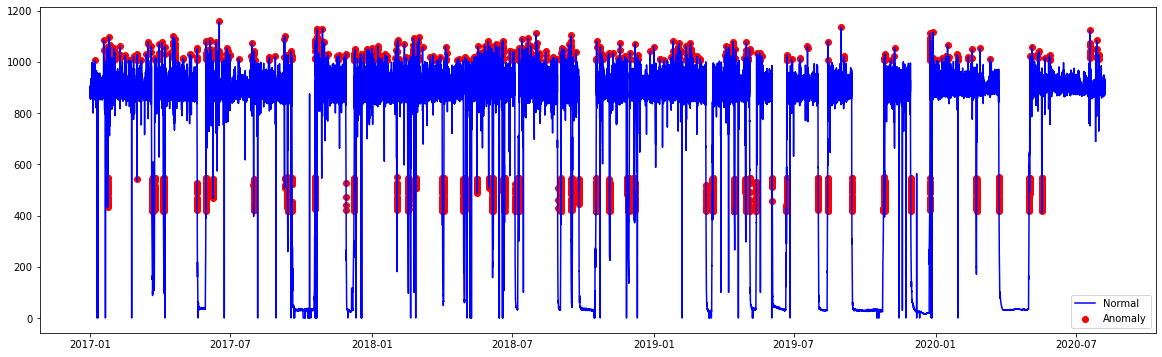

In [44]:
# visualization

fig, ax = plt.subplots(figsize=(20,6))

a = data1.loc[data1['anomaly2'] == -1, ['time', 'Cyclone_Inlet_Gas_Temp']] #anomaly

ax.plot(data1['time'], data1['Cyclone_Inlet_Gas_Temp'], color='blue', label = 'Normal')
ax.scatter(a['time'],a['Cyclone_Inlet_Gas_Temp'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

In [45]:
p1 = data1

In [46]:
#creating a dataframe of all the anomalies

ano_1 = p1[p1['anomaly2']==-1]

In [47]:
ano_1

,time,Cyclone_Inlet_Gas_Temp,anomaly2
1726,2017-01-06 23:50:00,1007.18,-1
4944,2017-01-18 04:00:00,1085.38,-1
4945,2017-01-18 04:05:00,1045.54,-1
6329,2017-01-22 23:25:00,1039.03,-1
6330,2017-01-22 23:30:00,1057.17,-1
...,...,...,...
374621,2020-07-27 18:10:00,1050.51,-1
374624,2020-07-27 18:25:00,1083.55,-1
375420,2020-07-30 12:45:00,1012.84,-1
375421,2020-07-30 12:50:00,1025.83,-1


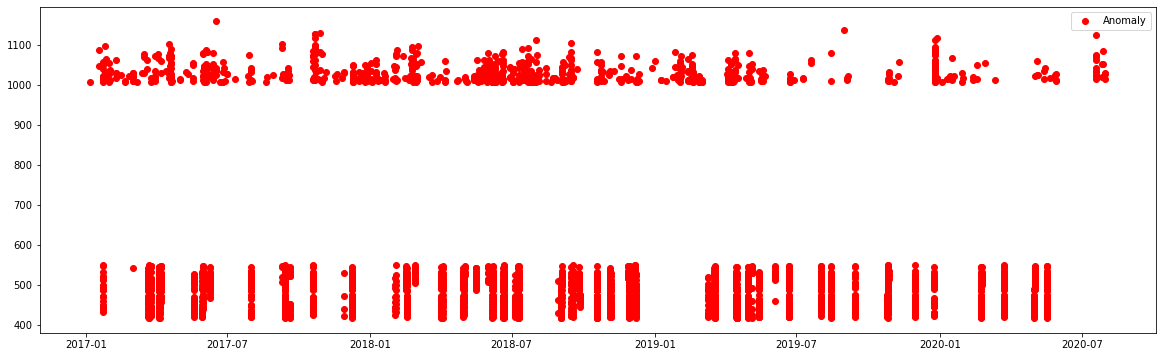

In [48]:
#visulisation of all the anomalies

fig, ax = plt.subplots(figsize=(20,6))

a = ano_1.loc[data1['anomaly2'] == -1, ['time', 'Cyclone_Inlet_Gas_Temp']] #anomaly

#ax.plot(ano_1['time'], ano_1['Cyclone_cone_draft'], color='blue', label = 'Normal')
ax.scatter(a['time'],a['Cyclone_Inlet_Gas_Temp'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [49]:
#Converting anomaly dataframe to csv

ano_1.to_csv('Anomaly_Cyclone_Inlet_Gas_Temp.csv')

In [ ]:
#Similarly doing the above with Cyclone_cone_draft attribute

In [59]:
data2 = dftb[["time","Cyclone_cone_draft"]]

In [60]:
data2.dtypes

time                  datetime64[ns]
Cyclone_cone_draft           float64
dtype: object

In [62]:
#checking for null values

data2.isna().sum()

time                     0
Cyclone_cone_draft    1320
dtype: int64

In [63]:
#dropping the null values

data3 = data2.dropna()

In [64]:
data3.isna().sum()

time                  0
Cyclone_cone_draft    0
dtype: int64

In [65]:
#Outlier detection using Isolation forest

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.01

data = data3[['Cyclone_cone_draft']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
data3['anomaly1'] = pd.Series(model.predict(data))

<ipython-input-65-68316c38041b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['anomaly1'] = pd.Series(model.predict(data))


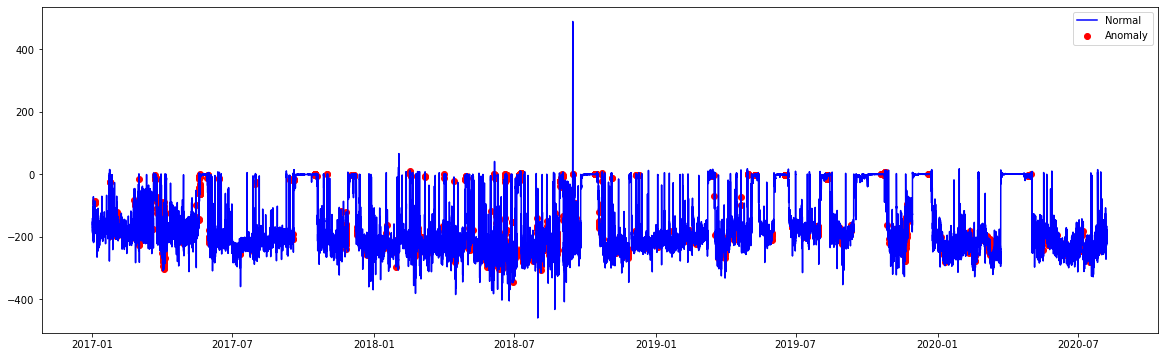

In [67]:
#visualisation

fig, ax = plt.subplots(figsize=(20,6))

a = data3.loc[data3['anomaly1'] == -1, ['time', 'Cyclone_cone_draft']] #anomaly

ax.plot(data3['time'], data3['Cyclone_cone_draft'], color='blue', label = 'Normal')
ax.scatter(a['time'],a['Cyclone_cone_draft'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [68]:
p3 = data3

In [69]:
ano_3 = p3[p3['anomaly1']==-1]

In [70]:
ano_3

,time,Cyclone_cone_draft,anomaly1
930,2017-01-04 05:30:00,-90.94,-1.0
931,2017-01-04 05:35:00,-92.26,-1.0
932,2017-01-04 05:40:00,-85.05,-1.0
3469,2017-01-13 01:05:00,-164.98,-1.0
5241,2017-01-19 04:45:00,-175.36,-1.0
...,...,...,...
372915,2020-07-21 20:00:00,-252.01,-1.0
372937,2020-07-21 21:50:00,-254.08,-1.0
372940,2020-07-21 22:05:00,-237.98,-1.0
374097,2020-07-25 22:30:00,-248.49,-1.0


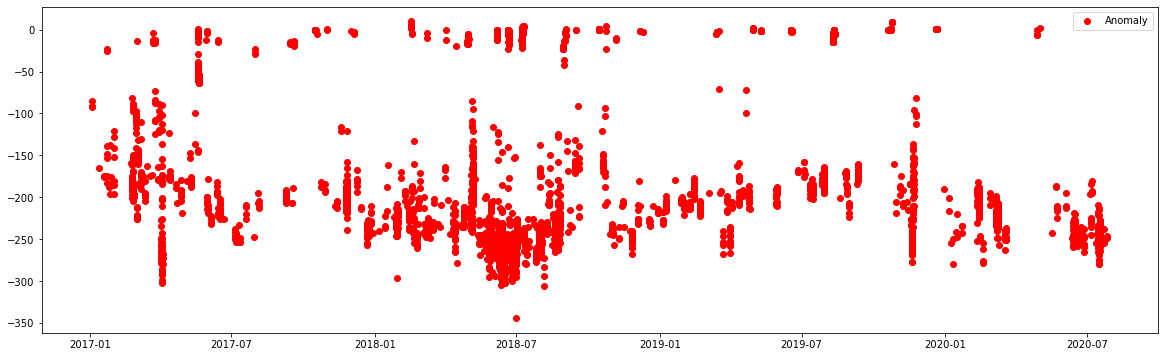

In [71]:
fig, ax = plt.subplots(figsize=(20,6))

a = ano_3.loc[data3['anomaly1'] == -1, ['time', 'Cyclone_cone_draft']] #anomaly

#ax.plot(ano_1['time'], ano_1['Cyclone_cone_draft'], color='blue', label = 'Normal')
ax.scatter(a['time'],a['Cyclone_cone_draft'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [72]:
ano_3.to_csv('Anomaly_Cyclone_cone_draft_with_dropna.csv')

In [ ]:
# Using the fillna method to fill null values with zero for Cyclone_cone_draft attribute

In [73]:
data4 = data2.fillna(0)

In [74]:
data4.isna().sum()

time                  0
Cyclone_cone_draft    0
dtype: int64

In [75]:
data4.dtypes

time                  datetime64[ns]
Cyclone_cone_draft           float64
dtype: object

In [76]:
#Outlier deterction using Isolation forest method for attribute Cyclone_cone_draft when rows with na 
#values are replaced with zero

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.01

data = data4[['Cyclone_cone_draft']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
data4['anomaly1'] = pd.Series(model.predict(data))

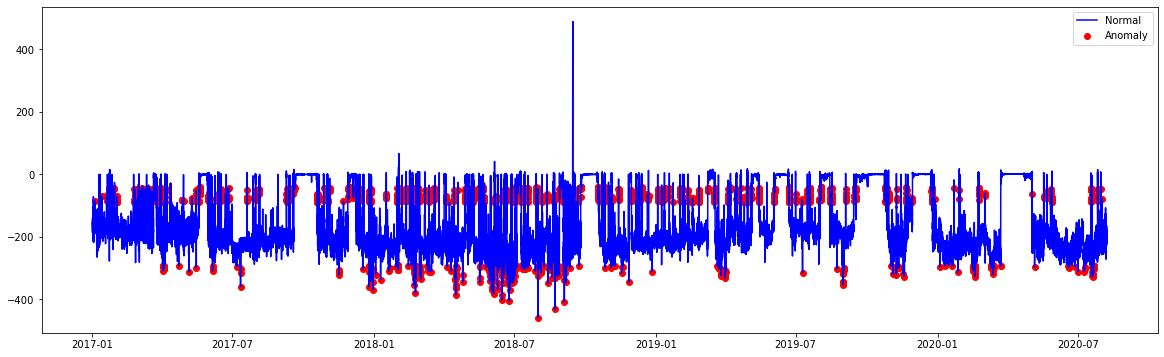

In [77]:
fig, ax = plt.subplots(figsize=(20,6))

a = data4.loc[data4['anomaly1'] == -1, ['time', 'Cyclone_cone_draft']] #anomaly

ax.plot(data4['time'], data4['Cyclone_cone_draft'], color='blue', label = 'Normal')
ax.scatter(a['time'],a['Cyclone_cone_draft'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [78]:
p4 = data4
ano_4 = p4[p4['anomaly1']==-1]
ano_4

,time,Cyclone_cone_draft,anomaly1
932,2017-01-04 05:40:00,-85.05,-1
3520,2017-01-13 05:20:00,-70.02,-1
5292,2017-01-19 09:00:00,-66.94,-1
5293,2017-01-19 09:05:00,-74.10,-1
5294,2017-01-19 09:10:00,-86.48,-1
...,...,...,...
374258,2020-07-26 11:55:00,-76.04,-1
374259,2020-07-26 12:00:00,-81.96,-1
374260,2020-07-26 12:05:00,-84.78,-1
375417,2020-07-30 12:30:00,-48.28,-1


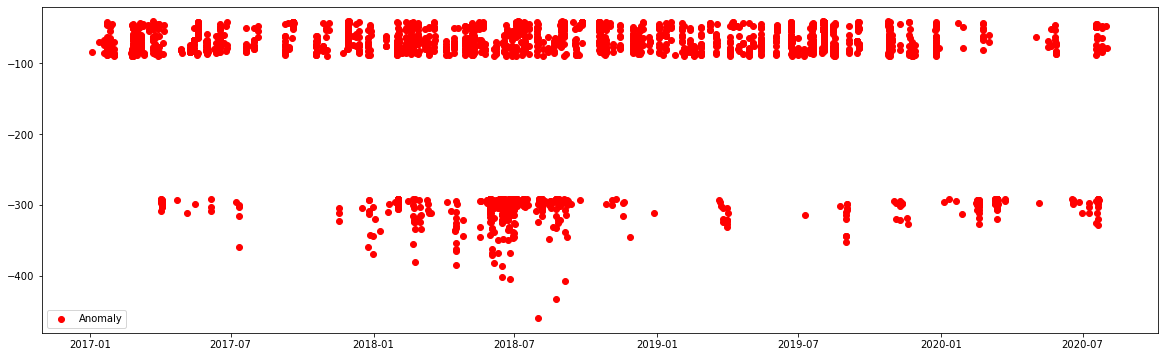

In [79]:
fig, ax = plt.subplots(figsize=(20,6))

a = ano_4.loc[data4['anomaly1'] == -1, ['time', 'Cyclone_cone_draft']] #anomaly

#ax.plot(ano_1['time'], ano_1['Cyclone_cone_draft'], color='blue', label = 'Normal')
ax.scatter(a['time'],a['Cyclone_cone_draft'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [80]:
ano_4.to_csv('Anomaly_Cyclone_cone_draft_with_fillna.csv')